# Import Modules

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

# Ignore anoying warnings 
import warnings
warnings.filterwarnings("ignore")

# Set Up Dataset

In [2]:
split = ['train[:70%]', 'train[70%:]']

In [3]:
(train_ds, test_ds), ds_info = tfds.load('cats_vs_dogs',
                                         split=split,
                                         as_supervised=True,
                                         shuffle_files=True,
                                         with_info=True)

Metal device set to: Apple M1


2022-09-07 16:05:11.576063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-07 16:05:11.576147: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Visualize Dataset

2022-09-07 16:05:11.640964: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


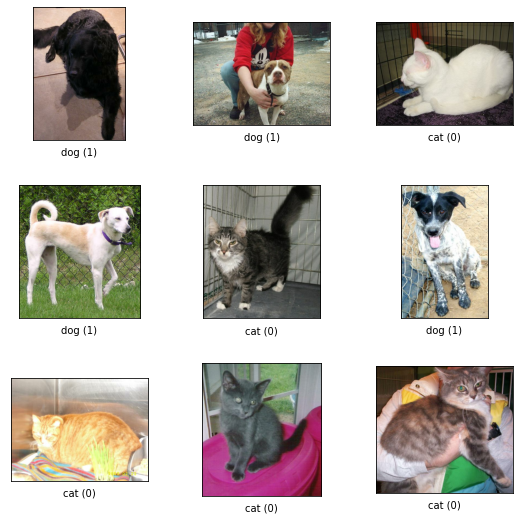

In [4]:
fig = tfds.show_examples(train_ds, ds_info)

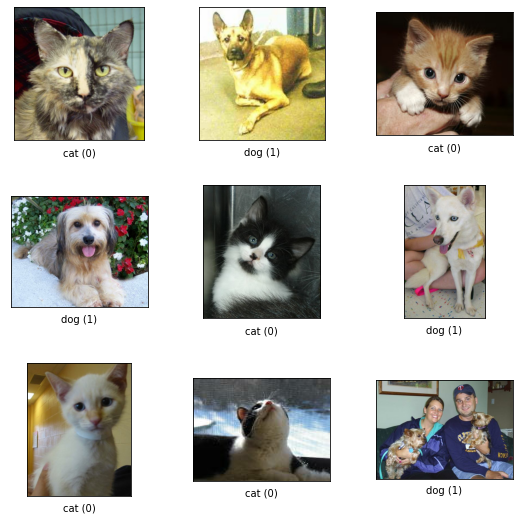

In [5]:
fig = tfds.show_examples(test_ds, ds_info)

# Preprocess Dataset

In [6]:
def preprocess(img, label):
    # resize to get images with all same size
    img = tf.image.resize(img, [200, 200])
    # normalize to get values between 0 and 1
    img = img / 255
    return img, label

In [7]:
train_ds = train_ds.map(preprocess).batch(32)

In [8]:
test_ds = test_ds.map(preprocess).batch(32)

# Build Model

In [9]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'])
# plt.grid()
# plt.show()

# Test with another model

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 32)       1

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=5, 
                    validation_data=test_ds)

Epoch 1/5


2022-09-07 16:05:12.866294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/509 [========>.....................] - ETA: 38s - loss: 1.2898 - accuracy: 0.5548

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/509 [==========>...................] - ETA: 35s - loss: 1.1728 - accuracy: 0.5673

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


274/509 [===============>..............] - ETA: 27s - loss: 1.0322 - accuracy: 0.5862

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


454/509 [=========================>....] - ETA: 6s - loss: 0.8698 - accuracy: 0.6164

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


476/509 [===========================>..] - ETA: 3s - loss: 0.8574 - accuracy: 0.6195

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


499/509 [============================>.] - ETA: 1s - loss: 0.8452 - accuracy: 0.6239

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


504/509 [============================>.] - ETA: 0s - loss: 0.8431 - accuracy: 0.6239

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.8410 - accuracy: 0.6240

2022-09-07 16:06:13.983099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 69s 135ms/step - loss: 0.8410 - accuracy: 0.6240 - val_loss: 0.6377 - val_accuracy: 0.6381
Epoch 2/5
167/509 [========>.....................] - ETA: 40s - loss: 0.5921 - accuracy: 0.6944

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/509 [==========>...................] - ETA: 36s - loss: 0.5924 - accuracy: 0.6911

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


276/509 [===============>..............] - ETA: 29s - loss: 0.5860 - accuracy: 0.6976

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


456/509 [=========================>....] - ETA: 6s - loss: 0.5753 - accuracy: 0.7085

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


474/509 [==========================>...] - ETA: 4s - loss: 0.5737 - accuracy: 0.7096

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


497/509 [============================>.] - ETA: 1s - loss: 0.5719 - accuracy: 0.7110

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


502/509 [============================>.] - ETA: 0s - loss: 0.5719 - accuracy: 0.7108

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.7106

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 72s 142ms/step - loss: 0.5720 - accuracy: 0.7106 - val_loss: 0.5542 - val_accuracy: 0.7233
Epoch 3/5
168/509 [========>.....................] - ETA: 39s - loss: 0.5299 - accuracy: 0.7513

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/509 [==========>...................] - ETA: 36s - loss: 0.5298 - accuracy: 0.7503

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


273/509 [===============>..............] - ETA: 27s - loss: 0.5222 - accuracy: 0.7547

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


455/509 [=========================>....] - ETA: 6s - loss: 0.5112 - accuracy: 0.7625

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


476/509 [===========================>..] - ETA: 3s - loss: 0.5092 - accuracy: 0.7631

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


498/509 [============================>.] - ETA: 1s - loss: 0.5086 - accuracy: 0.7634

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


503/509 [============================>.] - ETA: 0s - loss: 0.5088 - accuracy: 0.7633

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.7629

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 70s 137ms/step - loss: 0.5091 - accuracy: 0.7629 - val_loss: 0.8430 - val_accuracy: 0.4973
Epoch 4/5
165/509 [========>.....................] - ETA: 46s - loss: 0.4620 - accuracy: 0.7979

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/509 [==========>...................] - ETA: 41s - loss: 0.4609 - accuracy: 0.7990

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


275/509 [===============>..............] - ETA: 32s - loss: 0.4567 - accuracy: 0.7998

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


456/509 [=========================>....] - ETA: 7s - loss: 0.4551 - accuracy: 0.7985

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


476/509 [===========================>..] - ETA: 4s - loss: 0.4536 - accuracy: 0.7992

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


498/509 [============================>.] - ETA: 1s - loss: 0.4516 - accuracy: 0.7997

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


503/509 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.8000

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.7996

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 79s 154ms/step - loss: 0.4518 - accuracy: 0.7996 - val_loss: 0.5117 - val_accuracy: 0.7574
Epoch 5/5
165/509 [========>.....................] - ETA: 43s - loss: 0.4131 - accuracy: 0.8273

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/509 [==========>...................] - ETA: 37s - loss: 0.4092 - accuracy: 0.8291

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


275/509 [===============>..............] - ETA: 28s - loss: 0.4063 - accuracy: 0.8285

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


456/509 [=========================>....] - ETA: 6s - loss: 0.4018 - accuracy: 0.8289

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


475/509 [==========================>...] - ETA: 4s - loss: 0.4021 - accuracy: 0.8285

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


498/509 [============================>.] - ETA: 1s - loss: 0.4019 - accuracy: 0.8281

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


503/509 [============================>.] - ETA: 0s - loss: 0.4018 - accuracy: 0.8282

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


509/509 [==============================] - ETA: 0s - loss: 0.4030 - accuracy: 0.8275

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


509/509 [==============================] - 69s 135ms/step - loss: 0.4030 - accuracy: 0.8275 - val_loss: 0.4949 - val_accuracy: 0.7630


# Evaluation

<h3>Results:</h3>

**Model 1:**<br>
`loss: 0.0220`
`accuracy: 0.9937`
`val_loss: 1.6510`
`val_accuracy: 0.7249`<br>
We can clearly see that the model had overfitted the dataset.

**Model 2:** *Added Dropout* <br>
`loss: 0.2515`
`accuracy: 0.8919`
`val_loss: 0.5967`
`val_accuracy: 0.7674`

**Model 3:** *Shuffle Dataset* <br>
`loss: 0.3687`
`accuracy: 0.8346`
`val_loss: 0.4631`
`val_accuracy: 0.7818`

**Model 3:** * Added Batch Normalization* <br>
`loss: 0.3577`
`accuracy: 0.8403`
`val_loss: 0.4923`
`val_accuracy: 0.7967`

#### Compare Train Accuracy & Validation Accuracy

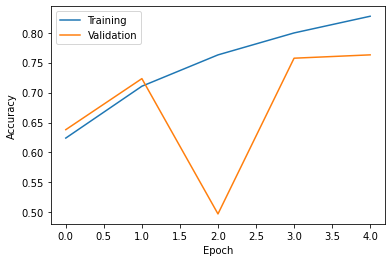

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

#### Compare Train Loss & Validation Loss

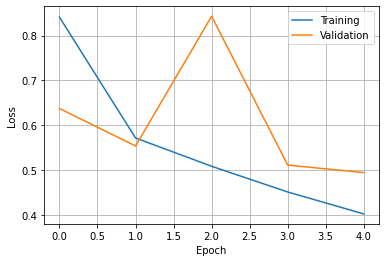

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

# Save Model

In [16]:
model.save('model.h5')